In [90]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Define to insert the function formed by the obtained interpolation into the original matrix to form a new matrix (insert row)
def pdr(placeholder,orim):
    irow = icol = 2*orim.shape[1]-1
    i = np.zeros([irow,icol])
    for col in range(orim.shape[1]):
        i[:,2*col] = orim[:,col]
        if 2*col+1<icol and col < placeholder.shape[1]:
            i[:,2*col+1] = placeholder[:,col]
    return i 

#Define to insert the function formed by the obtained interpolation into the original matrix to form a new matrix (insert column)
def pdc(placeholder,orim):
    irow = orim.shape[0]*2-1
    icol = orim.shape[1]
    i = np.zeros([irow,icol])
    for row in range(orim.shape[0]):        
        i[2*row,:] = orim[row,:]
        if 2*row+1<irow and row < placeholder.shape[0]:
            i[2*row+1,:] = placeholder[row,:]
    return i

#Define Lagrange interpolation function
def LIP(unk,n,x,y):
    sum = 0
    for i in range(0,n):
        t = 1
        for j in range(0,n):
            if j!= i:
                t = ((unk - x[j])/(x[i]-x[j]))*t
        sum = t*y[i]+sum
    if sum - int(sum)>0.5:
        sum = int(sum)+1
    else:
        sum = int(sum)
    return sum

(376, 241)


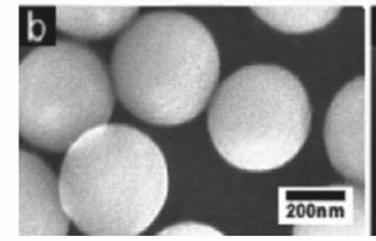

In [91]:
rgb = Image.open("C:/Users/12734/Desktop/数值分析/数值分析/课程设计/rgb.png").convert('L')
print(rgb.size)
rgb

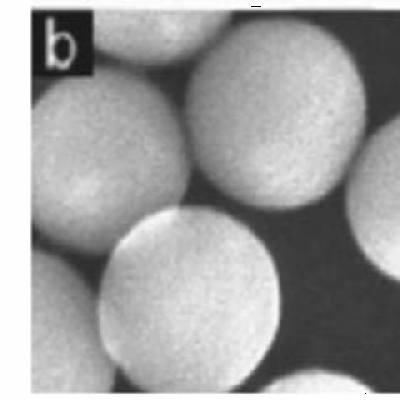

In [92]:
ip = int(3) #Define interpolation segment size

#interpolation
im= Image.new("L",(int(240/ip)*(2*ip-1),int(240/ip)*(2*ip-1)),(255))
for w in range(0,int(240/ip)):
    for h in range(0,int(240/ip)):
        grey = np.array(rgb)[w*ip:w*ip+ip,h*ip:h*ip+ip]

        placeholder1 = np.zeros([grey.shape[0]-1,grey.shape[1]])
        for i in range(grey.shape[1]):
            x = (np.arange(grey.shape[0]))*2+1
            y = grey[:,i]
            unks = np.arange(grey.shape[0]-1)*2+2
            for j in range(len(unks)):
                unks[j] = LIP(unks[j],len(x),x,y)
            placeholder1[:,i]=unks


        semi = pdc(placeholder1,grey)


        placeholder2 = np.zeros([semi.shape[0],semi.shape[1]-1])
        for i in range(semi.shape[0]):
            x = (np.arange(semi.shape[1]))*2+1
            y = semi[i,:]
            unks = np.arange(semi.shape[1]-1)*2+2
            for j in range(len(unks)):
                unks[j] = LIP(unks[j],len(x),x,y)
            placeholder2[i,:]=unks

            
        final = pdr(placeholder2,semi)
        
        #Define a new picture and integrate the interpolated segmented graph into the final large picture
        im1 = Image.fromarray(np.uint8(final),'L')
        for w1 in range(0,int(2*ip-1)):
            for h1 in range(0,int(2*ip-1)):
                data = im1.getpixel((h1,w1)) 
                im.putpixel((int(2*ip-1)*h+h1, int(2*ip-1)*w+w1), (data))
        
im